# Cơ sở lý thuyết

1. Phương pháp sử dụng các thư viện chẩn để thiết kế bộ lọc FIR 
    * Sử dụng hàm `firwin` để thực hiện bộ lọc FIR
    * Sử dụng 3 bộ lọc FIR xử lý đồng bộ
    * Tổng hợp và phân tích kết quả

2. Thử nghiệm lí thuyết với một số âm thanh đơn giản
    * Phân tích Magnitude Spectrum của kết quả
    * Phân tích Spectrogram của kết quả

In [1]:
import os
from scipy import signal
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as widgets
from ipywidgets import interact, Layout 
import LabUtils as mylab
from fir import apply_filters
# %matplotlib inline
import librosa, librosa.display


In [2]:
BASE_FOLDER = "/home/jayan/Desktop/Study/Digital Signal Processing/equalizer-app/audio/"
violin_sound_file = "violin_c.wav"
piano_sound_file = "piano_c.wav"
sax_sound_file = "sax.wav"
noise_sound_file = "noise.wav"

In [3]:
# load sounds
# violin_c4, sr = librosa.load(os.path.join(BASE_FOLDER, violin_sound_file))
# piano_c5, sr = librosa.load(os.path.join(BASE_FOLDER, piano_sound_file))
sax_c4, sr = librosa.load(os.path.join(BASE_FOLDER, sax_sound_file))
# noise, sr = librosa.load(os.path.join(BASE_FOLDER, noise_sound_file))

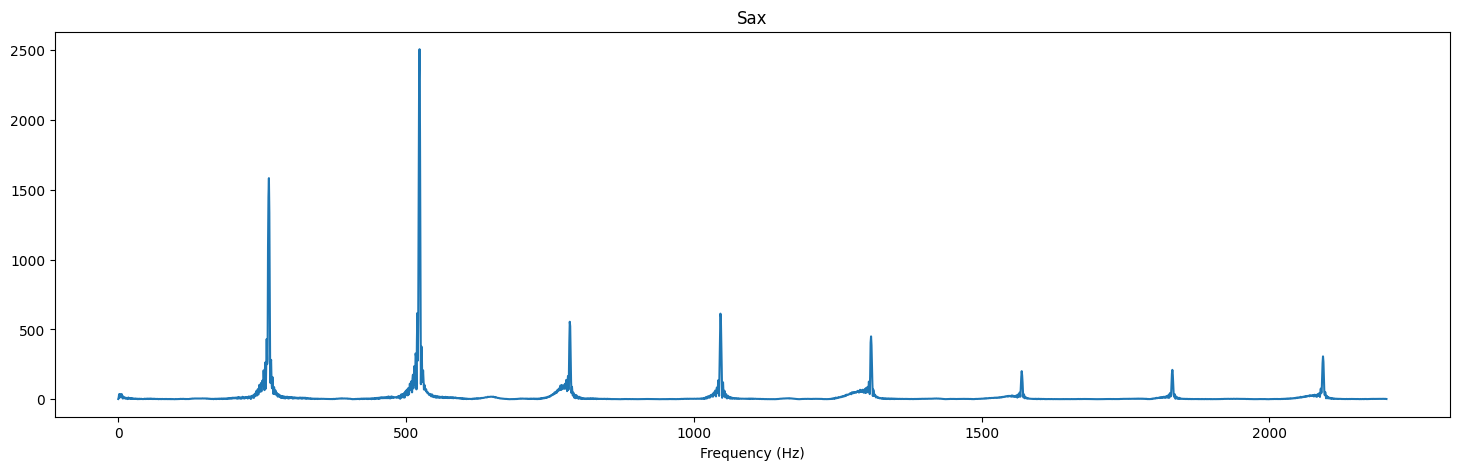

In [4]:
audio_sig = sax_c4
figure_title = "Sax"
def plot_magnitude_spectrum(signal, sr, title, f_ratio=1):
    X = np.fft.fft(signal)
    X_mag = np.absolute(X)
    
    plt.figure(figsize=(18, 5))
    
    f = np.linspace(0, sr, len(X_mag))
    f_bins = int(len(X_mag)*f_ratio)  
    
    plt.plot(f[:f_bins], X_mag[:f_bins])
    # plt.xlabel('Time (ms)')
    # plt.ylabel('Frequency (Hz)')
    plt.xlabel('Frequency (Hz)')
    plt.title(title)
plot_magnitude_spectrum(audio_sig, sr, figure_title, 0.1)

In [ ]:
bass_gain=1.0
mid_gain=1.0
treble_gain=1.0
filtered_audio, bass_filtered, mid_filtered, treble_filtered = apply_filters(audio_sig, bass_gain, mid_gain, treble_gain, fs=sr+1)
plot_magnitude_spectrum(filtered_audio, sr, figure_title + " Original", 0.1)
plot_magnitude_spectrum(bass_filtered, sr, figure_title + " Bass Band", 0.1)
plot_magnitude_spectrum(mid_filtered, sr, figure_title + " Mid Band", 0.1)
plot_magnitude_spectrum(treble_filtered, sr, figure_title + " Treble Band", 0.1)

ValueError: Invalid cutoff frequency: frequencies must be greater than 0 and less than fs/2.

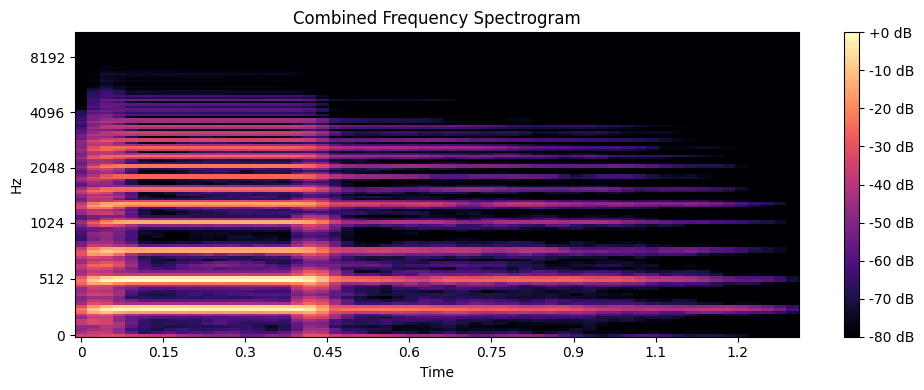

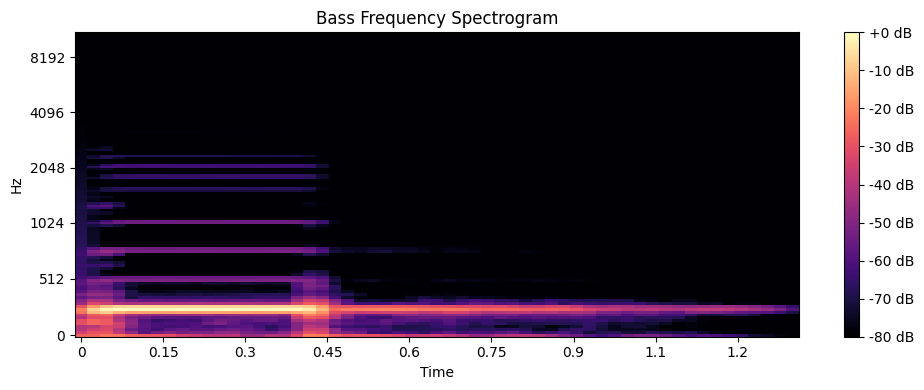

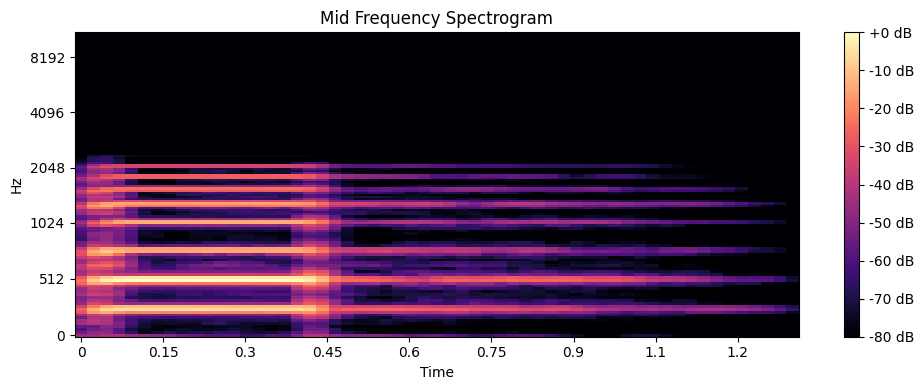

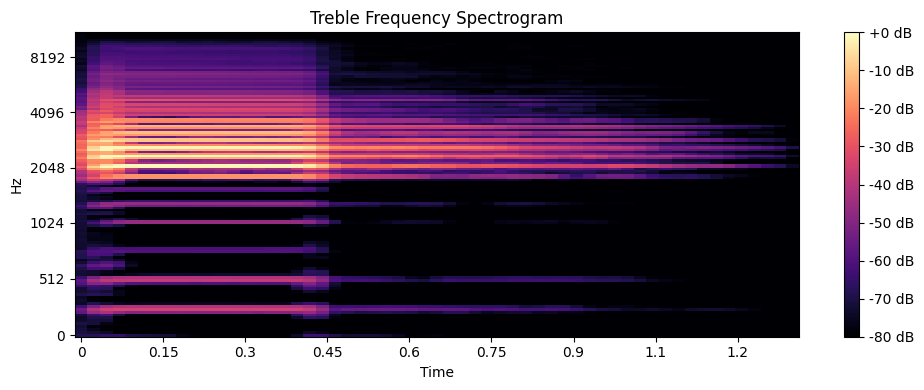

In [ ]:
for band_audio, band_name in zip([filtered_audio, bass_filtered, mid_filtered, treble_filtered], ['Combined', 'Bass', 'Mid', 'Treble']):
    spectrogram = librosa.feature.melspectrogram(y=band_audio, sr=sr)
    spectrogram_db = librosa.power_to_db(spectrogram, ref=np.max)

    plt.figure(figsize=(10, 4))
    librosa.display.specshow(spectrogram_db, sr=sr, x_axis='time', y_axis='mel')
    plt.colorbar(format='%+2.0f dB')
    plt.title(f'{band_name} Frequency Spectrogram')
    plt.tight_layout()